## Анализ бизнес-показателей в Яндекс.Афише

### Описание проекта
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты. У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов. Вы изучите: как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент когда клиент окупается.

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1)
- [Предобработка данных](#step2)
- [Исследовательский анализ данных](#step3)
- [EDA. Продукт](#step4)
- [EDA. Продажи](#step5)
- [EDA. Маркетинг](#step6)
- [Общий вывод](#step7)

---

### План исследования
- Изменить типы данных там, где необходимо;
- Привести названия столбцов к нижнему регистру.

---

- Посчитать DAU, WAU и MAU. Рассчитать средние значения этих метрик за весь период. Нарисовать графики метрик;
- Определить, сколько раз за день пользователи в среднем заходят на сайт. Нарисовать график;
- Проанализировать, сколько времени пользователи проводят на сайте. Определить продолжительность пользовательской сессии за все время;
- Рассчитать Retention Rate через когортный анализ.

---

- Проанализировать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;
- Рассчитать среднее количество покупок на одного покупателя за весь период по когортам;
- Рассчитать средний чек;
- Проанализировать, как изменяется метрика LTV со временем для каждой когорты.

---

- Посчитать и нарисовать графики маркетинговых метрик с разбивкой по рекламным источникам;
- Посчитать общую сумму расходов на маркетинг. Посмотреть, как траты распределены по источникам;
- Рассчитать средний CAC на покупателя по всему проекту и для каждого источника трафика;
- Рассчитать ROMI по когортам с разбивкой по источникам. 

---

- Написать общий вывод и дать рекомендации маркетологам.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [1]:
# импортируем библиотки
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# импортируем датасет с данными о пользователях
visits = pd.read_csv('')

In [3]:
# импортируем датасет с данными о заказах
orders = pd.read_csv('')

In [4]:
# импортируем датасет с данными о расходах на маркетинг
costs = pd.read_csv('')

In [6]:
# первичное представление visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
# первые 5 строк
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
# посмотрим уникальные значения
for column in visits.columns:
    print(visits[column].value_counts())

desktop    262567
touch       96833
Name: Device, dtype: int64
2017-11-24 16:51:00    23
2017-11-24 16:52:00    21
2017-11-24 16:50:00    18
2017-11-24 16:46:00    15
2017-11-24 16:40:00    14
                       ..
2018-02-28 16:49:00     1
2018-02-02 15:05:00     1
2018-01-06 16:52:00     1
2018-03-06 19:03:00     1
2017-10-29 22:03:00     1
Name: End Ts, Length: 224760, dtype: int64
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64
2017-11-24 16:06:00    19
2017-11-24 17:19:00    15
2017-11-24 17:21:00    15
2018-05-31 10:01:00    15
2017-11-24 15:57:00    14
                       ..
2018-04-30 10:32:00     1
2017-07-28 10:34:00     1
2017-08-25 23:42:00     1
2018-01-29 15:09:00     1
2017-08-12 23:48:00     1
Name: Start Ts, Length: 224303, dtype: int64
12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
805641812194726298

In [9]:
# проверим на пропуски
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [10]:
# проверим на дубликаты
visits.duplicated().sum()

0

In [11]:
# первичное представление orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
# первые 5 строк
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [14]:
# уникальные значения
for column in orders.columns:
    print(orders[column].value_counts())

2018-05-31 10:13:00    9
2017-11-24 17:42:00    8
2017-11-24 17:36:00    7
2018-05-31 10:02:00    7
2018-05-31 10:27:00    7
                      ..
2018-01-17 11:51:00    1
2018-01-29 23:38:00    1
2017-09-05 15:59:00    1
2018-02-23 13:20:00    1
2018-03-21 13:16:00    1
Name: Buy Ts, Length: 45991, dtype: int64
1.83       2552
2.44       2464
3.67       2421
1.22       2216
3.05       2041
           ... 
7.56          1
7.55          1
1236.28       1
14.27         1
107.55        1
Name: Revenue, Length: 1149, dtype: int64
3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
16705253310465048548      1
9505264890679494151       1
Name: Uid, Length: 36523, dtype: int64


In [15]:
# проверим на пропуски
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [16]:
# проверим на дубликаты
orders.duplicated().sum()

0

In [17]:
# первичное представление costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
# первые 5 строк
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [21]:
# уникальные значения
for column in costs.columns:
    print(costs[column].value_counts())

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64
2017-09-18    7
2017-12-05    7
2017-11-18    7
2017-12-11    7
2017-09-10    7
             ..
2018-05-15    7
2017-07-14    7
2018-04-04    7
2018-02-24    7
2018-03-31    1
Name: dt, Length: 364, dtype: int64
16.25     3
50.77     3
12.87     3
6.35      3
16.81     3
         ..
193.39    1
13.68     1
91.65     1
45.10     1
62.25     1
Name: costs, Length: 2396, dtype: int64


In [22]:
# проверим на пропуски
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [23]:
# проверим на дубликаты
costs.duplicated().sum()

0

#### Вывод


#### Датасет visits
#### Наименования столбцов
- Device - категория устройства пользователя;
- End Ts - дата и время окончания сессии;
- Source Id - идентификатор рекламного источника, из которого пришел пользователь;
- Start Ts -  дата и время начала сессии;
- Uid - уникальный идентификатор пользователя. 

---

#### Датасет orders
#### Наименования столбцов
- Buy Ts - дата и время заказа;
- Revenue - выручка Яндекс.Афиши с этого заказа;
- Uid - уникальный id пользователя, который сделал заказ.

---

#### Датасет costs
#### Наименования столбцов
- source_id - идентификатор рекламного источника;
- dt - дата;
- costs - затраты на этот рекламный источник в этот день.

--- 

#### На этапе предобработки необходимо:
- тип данных столбцов End Ts и Start Ts датасета visits, тип данных столбца Buy Ts датасета orders, тип данных столбца dt датасета costs привести к форматы даты;
- наименования столбцов vists и orders привести к нижнему регистру.

### <a id='step2'>Предобработка данных</a>

In [24]:
# столбцы в visits к нижнему регистру
visits.columns = visits.columns.str.lower()

In [25]:
# столбцы в orders к нижнему регистру
orders.columns = orders.columns.str.lower()

In [26]:
# переименуем столбцы visits
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [27]:
# переименуем столбцы orders
orders.columns = ['buy_ts', 'revenue', 'uid']

In [28]:
# типы данных столбцов end_ts и start_ts к формату даты
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")

In [29]:
# проверим
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [30]:
# столбец buy_ts в orders к формату даты
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M")

In [31]:
# столбец dt в costs к формату даты
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M")

### <a id='step3'>Исследовательский анализ данных</a>

### <a id='step4'>EDA. Продукт</a>

In [32]:
# в датасете visits создадим столбцы с данными о дне, неделе, месяце и годе начала сессии

# неделя
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')

# месяц
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')

# год
visits['session_year'] = visits['start_ts'].astype('datetime64[Y]')

# полная дата
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')

In [33]:
# первые 5 строк
visits.head()

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_year,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-01-01,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-01-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-01-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-01-01,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017-01-01,2017-12-27


In [34]:
# рассчитаем DAU
dau = visits.groupby('session_date').agg({'uid': 'nunique'})

In [35]:
# среднее DAU
print('Количество уникальных пользователей в день: {}'.format(dau.mean().iloc[0].round()))

Количество уникальных пользователей в день: 908.0


In [36]:
sns.set_theme(style="whitegrid")

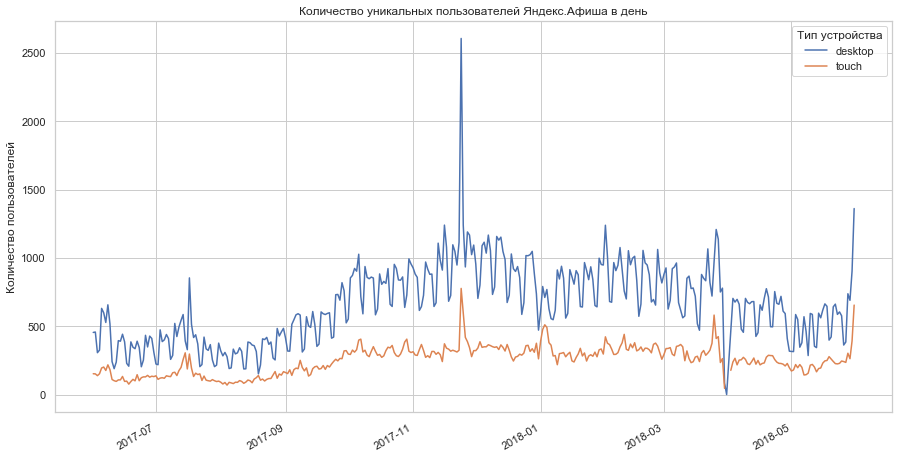

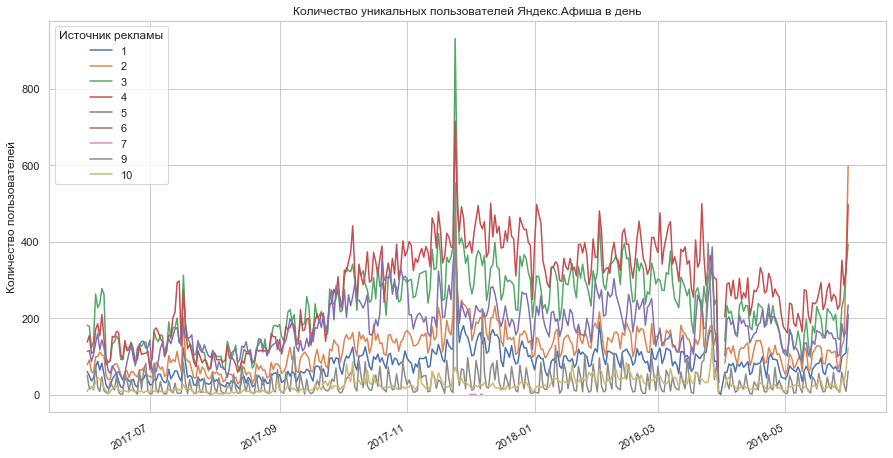

In [37]:
# нарисуем графики с метрикой DAU с разбивкой по типу устройства и по источнику рекламы

# график с разбивкой по типу устройства
dau_device = visits.pivot_table(index='session_date', columns = 'device', values = 'uid', aggfunc = 'nunique')
dau_device.plot(figsize = (15, 8), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в день')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Тип устройства')
plt.show()

# график с разбивкой по источнику рекламы
dau_source = visits.pivot_table(index='session_date', columns = 'source_id', values = 'uid', aggfunc = 'nunique')
dau_source.plot(figsize = (15, 8), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в день')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Источник рекламы')
plt.show()

- Пользователей десктопной версии больше, чем мобильных юзеров;
- Самый эффективный рекламный источник - 4, однако наибольший охват в день у 3 источника;
- Самые неэффективные источники - 7, 10, 9, 1 - их дневной охват практически всегда меньше двухсот человек;
- Наиболее активный период дневной активности приходится на предновогодние дни.

In [38]:
# рассчитаем WAU
wau = visits.groupby('session_week').agg({'uid': 'nunique'})

In [39]:
# среднее WAU
print('Количество уникальных пользователей в неделю: {}'.format(wau.mean().iloc[0].round()))

Количество уникальных пользователей в неделю: 5724.0


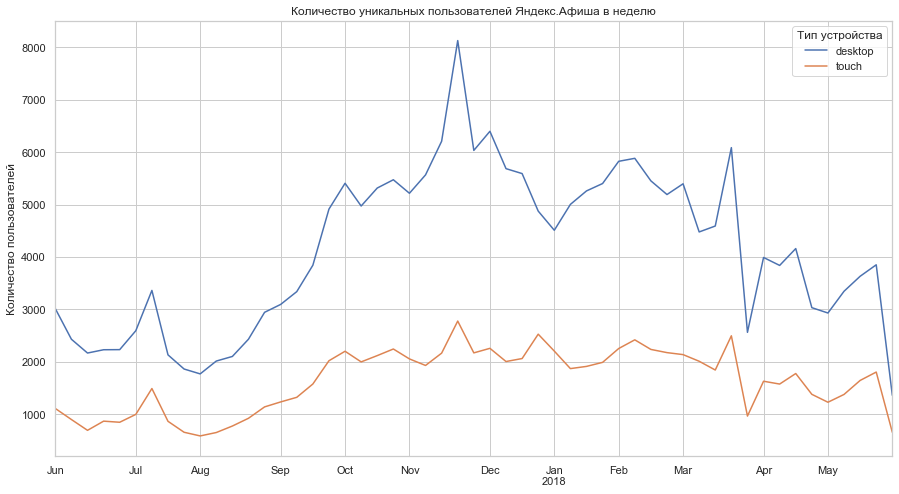

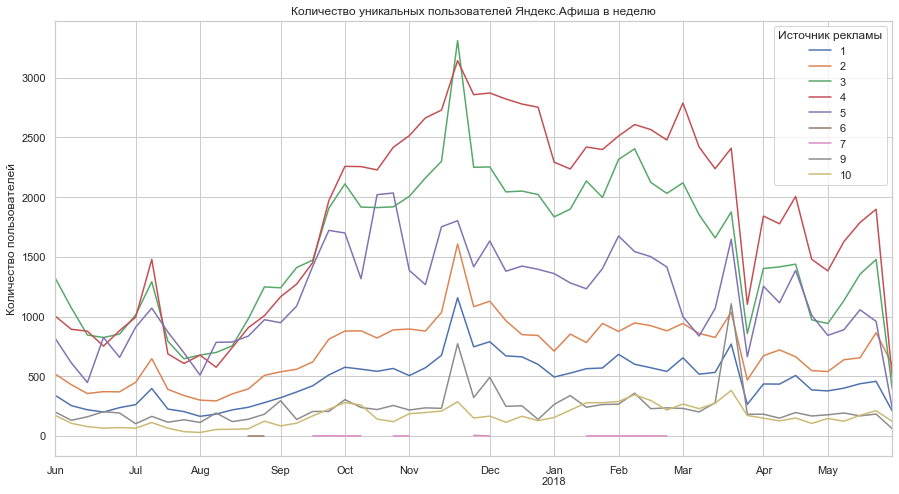

In [40]:
# нарисуем графики с метрикой WAU с разбивкой по типу устройства и по источнику рекламы

# график с разбивкой по типу устройства
wau_device = visits.pivot_table(index='session_week', columns = 'device', values = 'uid', aggfunc = 'nunique')
wau_device.plot(figsize = (15, 8), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в неделю')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Тип устройства')
plt.show()

# график с разбивкой по источнику рекламы
wau_source = visits.pivot_table(index='session_week', columns = 'source_id', values = 'uid', aggfunc = 'nunique')
wau_source.plot(figsize = (15, 8), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в неделю')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Источник рекламы')
plt.show()

- Активность пользователей практически не отличается от данных по дням. Десктопной версией пользуются больше;
- Наиболее эффективные рекламные источники - 3 и 4;
- Наименее эффективные рекламные источники  - 7 и 10.

In [41]:
# рассчитаем MAU
mau = visits.groupby('session_month').agg({'uid': 'nunique'})

In [42]:
# среднее MAU
print('Количество уникальных пользователей в месяц: {}'.format(mau.mean().iloc[0].round()))

Количество уникальных пользователей в месяц: 23228.0


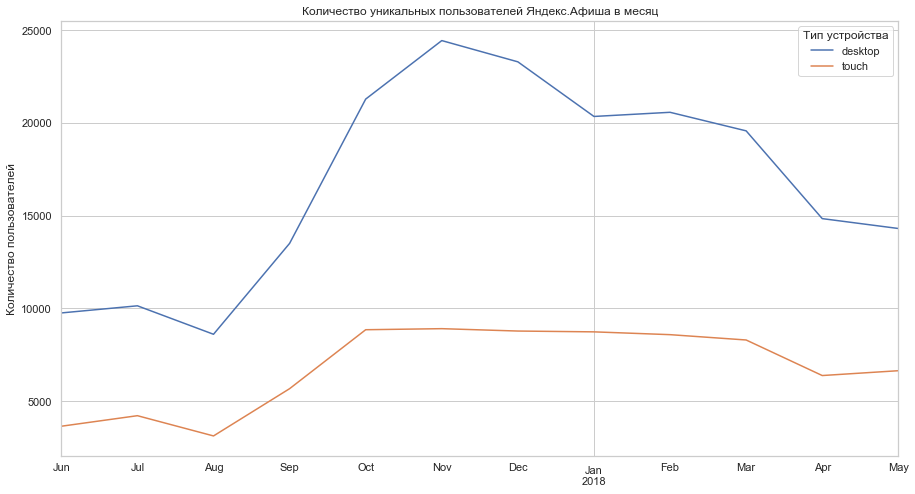

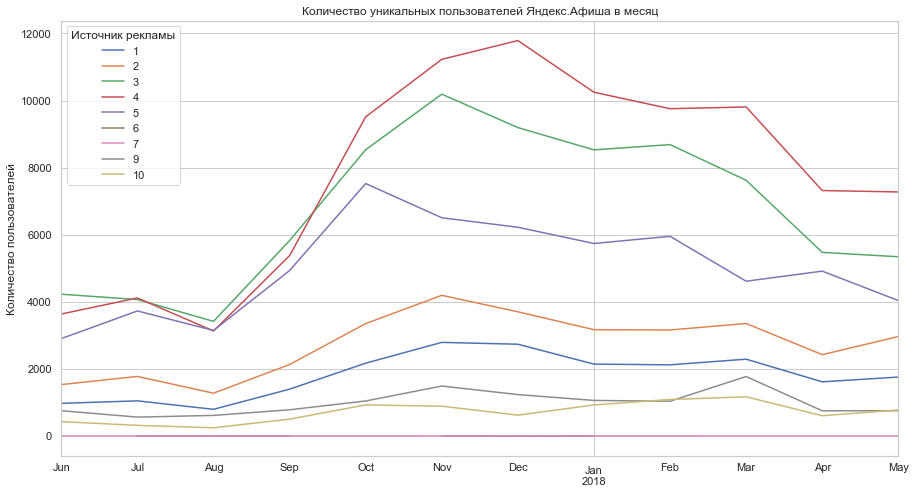

In [43]:
# нарисуем графики с метрикой MAU с разбивкой по типу устройства и по источнику рекламы

# график с разбивкой по типу устройства
mau_device = visits.pivot_table(index='session_month', columns = 'device', values = 'uid', aggfunc = 'nunique')
mau_device.plot(figsize = (15, 8), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в месяц')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Тип устройства')
plt.show()

# график с разбивкой по источнику рекламы
mau_device = visits.pivot_table(index='session_month', columns = 'source_id', values = 'uid', aggfunc = 'nunique')
mau_device.plot(figsize = (15, 8), grid = True)
plt.title('Количество уникальных пользователей Яндекс.Афиша в месяц')
plt.xlabel('')
plt.ylabel('Количество пользователей')
plt.legend(title = 'Источник рекламы')
plt.show()

- Пользователей десктопной версии больше, чем мобильных юзеров;
- Наиболее эффективные рекламный источник - 3 и 4;
- Наименее эффективный рекламный источник - 7.

In [44]:
# посчитаем количество сессий в день
sessions_per_day = visits.groupby('session_date').agg({'uid': 'count'})

In [45]:
print('Количество сессий в день: {}'.format(sessions_per_day.mean().iloc[0].round()))

Количество сессий в день: 987.0


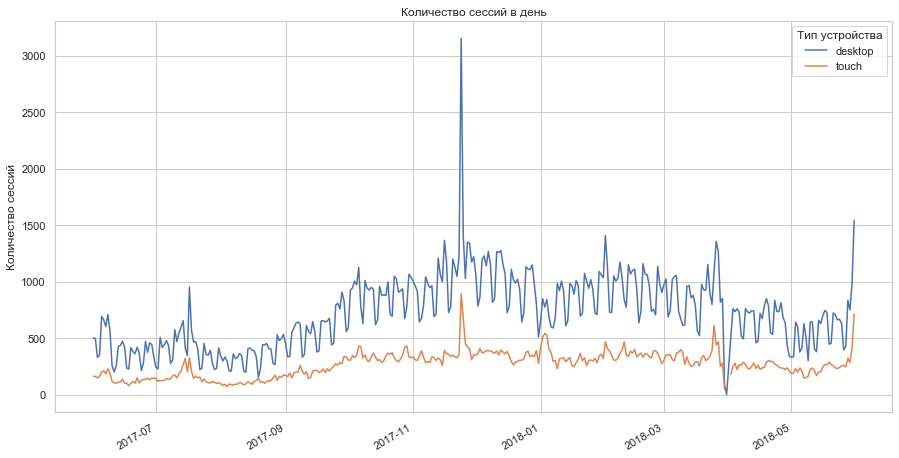

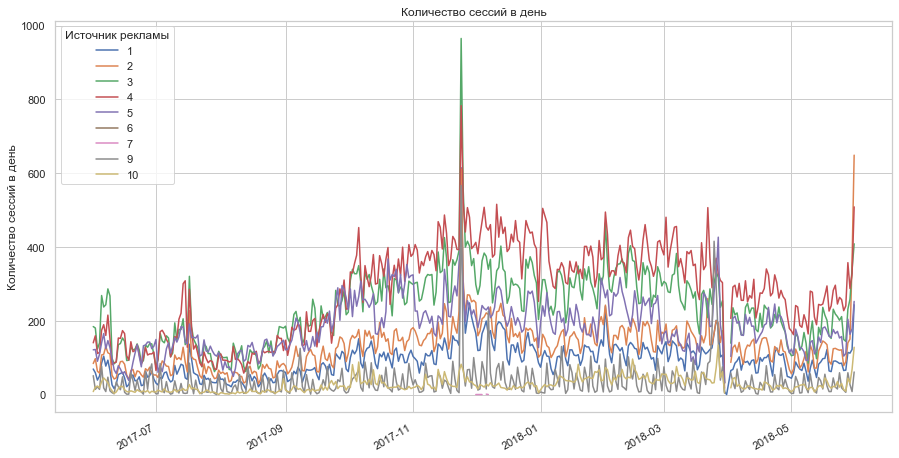

In [46]:
# нарисуем графики количества сессий с разбивкой по типу устройства и по источнику рекламы

# график с разбивкой по типу устройства
sessions_per_day_device = visits.pivot_table(index='session_date', columns = 'device', values = 'uid', aggfunc = 'count')
sessions_per_day_device.plot(figsize = (15, 8), grid = True)
plt.title('Количество сессий в день')
plt.xlabel('')
plt.ylabel('Количество сессий')
plt.legend(title = 'Тип устройства')
plt.show()

# график с разбивкой по источнику рекламы
sessions_per_day_source = visits.pivot_table(index='session_date', columns = 'source_id', values = 'uid', aggfunc = 'count')
sessions_per_day_source.plot(figsize = (15, 8), grid = True)
plt.title('Количество сессий в день')
plt.xlabel('')
plt.ylabel('Количество сессий в день')
plt.legend(title = 'Источник рекламы')
plt.show()

- Больше сессий приходится на десктопную версию;
- Наиболее эффективные рекламные источники - 3, 4 и 5;
- Наименее эффективные рекламные источники - 7 и 10.

In [47]:
# посчитаем среднюю продолжительность одной сессии
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']) / np.timedelta64(1,'s')

In [48]:
# первые 5 строк
visits.head()

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_year,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-01-01,2017-12-20,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-01-01,2018-02-19,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-01-01,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-01-01,2018-05-20,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017-01-01,2017-12-27,0.0


In [49]:
# рассчитаем моду
print('Самая частая длительность сессии составляет {:.0f} секунд'.format(visits['session_duration_sec'].mode()[0]))

Самая частая длительность сессии составляет 60 секунд


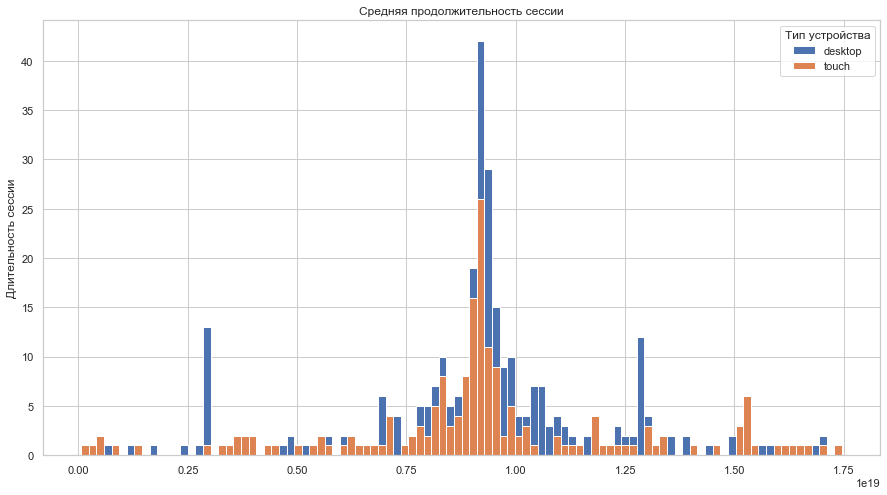

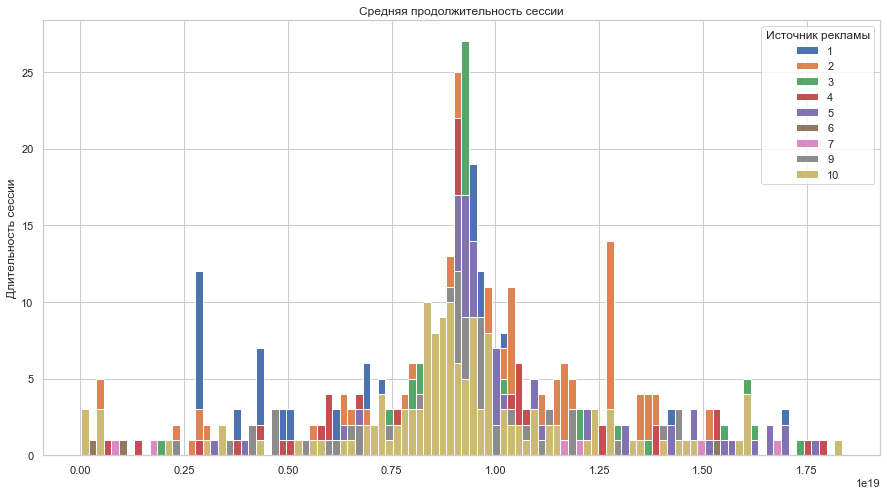

In [51]:
# нарисуем графики средней продолжительность сессиии с разбивкой по типу устройства и источнику рекламы

# средняя продолжительность сессии с разбикой по типу устройства
sessions_duration_sec_device = visits.pivot_table(index='session_duration_sec', columns = 'device', values = 'uid', aggfunc = 'mean')\
.plot(kind='hist', bins = 100, figsize = (15, 8), grid = True)
plt.title('Средняя продолжительность сессии')
plt.xlabel('')
plt.ylabel('Длительность сессии')
plt.legend(title = 'Тип устройства')
plt.show()

# средняя продолжительность сессии с разбивкой по источнику рекламы
sessions_deuration_sec_source = visits.pivot_table(index='session_duration_sec', columns = 'source_id', values = 'uid', aggfunc = 'mean')\
.plot(kind='hist', bins = 100, figsize = (15, 8), grid = True)
plt.title('Средняя продолжительность сессии')
plt.xlabel('')
plt.ylabel('Длительность сессии')
plt.legend(title = 'Источник рекламы')
plt.show()

- У десктопной версии средняя продолжительность сессии больше, чем у мобильной;
- Наиболее продолжительные сессии у юзеров, которые пришла из 3, 2 и 5 рекламного источника;
- Наимнее продолжительные сессии у юзеров из 7 источника.

In [52]:
# посчитаем, когда пользователь впервые воспользовался сервисом
first_visits_customer = visits.groupby(['uid'])['start_ts'].min()
first_visits_customer.name = 'first_visit'

In [53]:
# джойним с основым датасетом visits
visits = visits.join(first_visits_customer, on='uid')

In [54]:
# проверим
visits.head()

,device,end_ts,source_id,start_ts,uid,session_week,session_month,session_year,session_date,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-01-01,2017-12-20,1080.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-01-01,2018-02-19,1680.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-01-01,2017-07-01,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-01-01,2018-05-20,1440.0,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017-01-01,2017-12-27,0.0,2017-12-27 14:06:00


#### Посчитаем Retention Rate

In [55]:
# сформируем когорты по месяцам
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')

visits['visit_month'] = visits['session_date'].astype('datetime64[M]')

In [56]:
# посчитаем lifetime пользователей
visits['cohort_lifetime'] = ((visits['start_ts'] - visits['first_visit_month']) / np.timedelta64(1,'M'))\
.astype(int)

In [57]:
# посчитаем для каждой когорты количество уникальных пользователей на каждый месяц
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [58]:
# найдем исходное количество пользователей на нулевую неделю
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]

In [59]:
# переименуем столбец
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [60]:
# объединение данных по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')

In [61]:
# посчитаем Retention Rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [62]:
# выведем 5 строк
cohorts.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1030,13259,0.077683
2,2017-06-01,2,687,13259,0.051814
3,2017-06-01,3,834,13259,0.062901
4,2017-06-01,4,899,13259,0.067803


In [63]:
# сводная таблица для отрисовки тепловой карты
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime', values='retention',aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

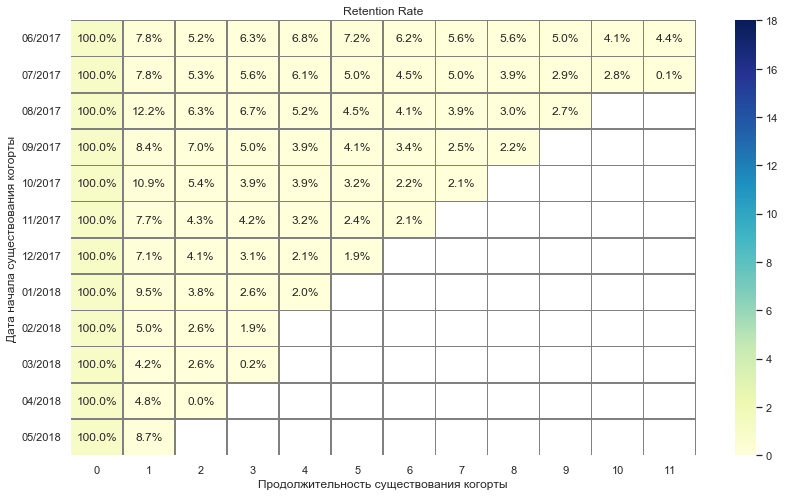

In [64]:
# нарисуем тепловую карту
plt.figure(figsize=(14, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=.5, linecolor='gray', \
           vmin=0, vmax=18, cmap='YlGnBu')
plt.title('Retention Rate')
plt.xlabel('Продолжительность существования когорты')
plt.ylabel('Дата начала существования когорты')
plt.show();

In [65]:
print('Retention Rate: ', '{:.2f}'.format(cohorts['retention'].mean()))

Retention Rate:  0.19


- Retention Rate равен 0.19;
- С течением времени по всем когортам видно снижение значения Retention Rate. Очевидно, что с ресурсом что-то не так;
- Самый большой RR после первого месяца - 12.2% - у когорты от 08.2017;
- Самый низкий RR после первого месяца - 4.2% - у когорты от 03.2018.

#### Вывод

- DAU - 908;
- WAU - 5724;
- MAU - 23228;
- Среднее количество сессий в день - 987;
- ASL - 60 секунд;
- RR - 0,19.

---

##### Общие выводы
- Пользователей десктопной версии больше, чем мобильных юзеров;
- Наиболее эффективные рекламные источники - 3 и 4;
- Наименее эффективные рекламные источники - 7, 10 и 9;
- Наибольшая активность приходится на новогодние праздники;
- Основая масса сессий распределена с октября до апреля, что объяснено повышение спроса на мероприятия;
- С сервисом определенно что-то не так, т.к RR когорт падает с каждым месяцем.

### <a id='step5'>EDA. Продажи</a>

In [66]:
# добавим в датасет orders столбец с полной датой покупки
orders['buy_date'] = orders['buy_ts'].astype('datetime64[D]')

In [67]:
# первые 5 строк
orders.head()

,buy_ts,revenue,uid,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [68]:
# найдем время первой покупки
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()

# переименуем столбцы
first_purchase.columns = ['uid', 'first_purchase']

In [69]:
# посмотрим, сколько проходит с момента посещения до первой покупки
time_to_order = visits.merge(first_purchase, on = 'uid')
time_to_order['time_to_first_purchase'] = pd.to_timedelta((time_to_order['first_purchase'] - time_to_order['first_visit']).\
                                                          dt.days, unit='d') / np.timedelta64(1,'D')

In [70]:
print('С момента посещения сайта до первой покупки проходит: {}'.format(time_to_order['time_to_first_purchase'].mode().iloc[0]))

С момента посещения сайта до первой покупки проходит: 0.0


#### Сколько покупок совершают пользователи за когортный период?

In [71]:
# сфомируем когорту по месяцу
orders['order_month'] = orders['buy_date'].astype('datetime64[M]')

In [72]:
# найдем месяц первой покупки пользователя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [73]:
# количество покупателей за каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [74]:
# месяц первой покупки каждого пользователя добавим в orders
orders_new = pd.merge(orders,first_orders, on='uid')

In [75]:
# подсчитаем количество заказов
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'buy_ts': 'count', 'revenue' : 'sum'}).reset_index()

In [76]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [77]:
# первые 5 строк
report.head()

,first_order_month,n_buyers,order_month,buy_ts,revenue
0,2017-06-01,2023,2017-06-01,2354,9557.49
1,2017-06-01,2023,2017-07-01,177,981.82
2,2017-06-01,2023,2017-08-01,174,885.34
3,2017-06-01,2023,2017-09-01,226,1931.30
4,2017-06-01,2023,2017-10-01,292,2068.58


In [78]:
# найдем возраст когорты
report['age'] = ((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M'))\
.round().astype('int')

In [79]:
# найдем количество покупок на каждого пользователя
report['rate'] = report['buy_ts'] / report['n_buyers']

In [80]:
# первые 5 строк
report.head()

,first_order_month,n_buyers,order_month,buy_ts,revenue,age,rate
0,2017-06-01,2023,2017-06-01,2354,9557.49,0,1.163618
1,2017-06-01,2023,2017-07-01,177,981.82,1,0.087494
2,2017-06-01,2023,2017-08-01,174,885.34,2,0.086011
3,2017-06-01,2023,2017-09-01,226,1931.30,3,0.111715
4,2017-06-01,2023,2017-10-01,292,2068.58,4,0.144340


In [81]:
# сводная таблица для отрисовки тепловой карты
report_pivot = report.pivot_table(index='first_order_month',
                                columns='age',
                                values='rate',
                                aggfunc='mean')
report_pivot.index = report_pivot.index.strftime("%m/%Y")

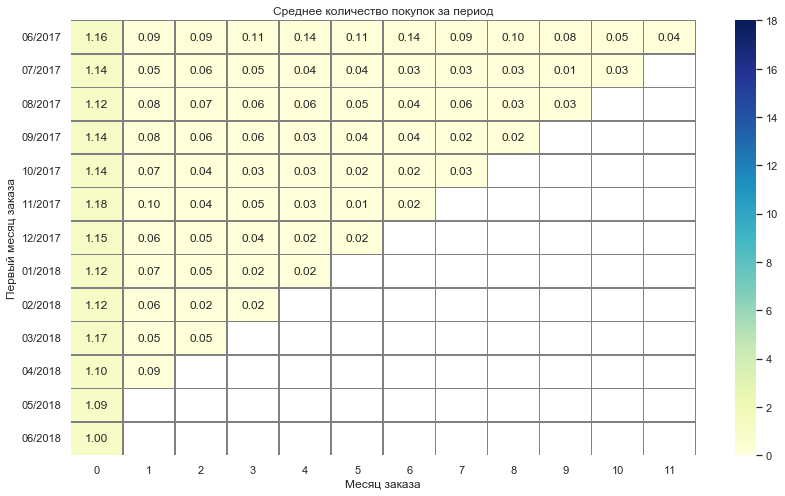

In [82]:
# нарисуем тепловую карту
plt.figure(figsize=(14, 8))
sns.heatmap(report_pivot, annot=True, fmt='.2f', linewidths=.5, linecolor='gray',\
           vmin=0, vmax=18, cmap='YlGnBu')
plt.title('Среднее количество покупок за период')
plt.xlabel('Месяц заказа')
plt.ylabel('Первый месяц заказа')
plt.show();

In [83]:
print('Среднее количество покупок за все периоды: ', '{:.2f}'.format(report['rate'].mean()))

Среднее количество покупок за все периоды:  0.23


- Среднее количество покупок - 0.23. То есть, пользователи практически не совершают покупок;
- Наибольшее количество покупок в первый месяц у когорты от 11.2018 - 1.18;
- Наименьшее количество покупок в первый месяц у когорты от от 06.2018 - 1.00;
- Количество покупок существенно снижается у всех когорт после первого месяца и продолжает снижаться на протяжении всего периода.

In [84]:
# рассчитаем средний чек

average_check = orders_new.groupby('order_month').agg({'buy_ts' : 'count', 'revenue' : 'sum'})

# средний чек
average_check['mean'] = average_check['revenue'] / average_check['buy_ts']

In [85]:
print('Средний чек:', '{:.2f} $'.format(average_check['mean'].sum()))

Средний чек: 62.90 $


In [86]:
# рассчитаем LTV

# сформируем когорту по месяцам
costs['month'] = costs['dt'].astype('datetime64[M]')

# маржинальность
margin_rate = 1

# рассчитаем валовую прибыль
report['gp'] = report['revenue'] * margin_rate

# LTV
report['ltv'] = (report['gp'] / report['n_buyers']).round(2)

In [87]:
# первые 5 строк
report.head()

,first_order_month,n_buyers,order_month,buy_ts,revenue,age,rate,gp,ltv
0,2017-06-01,2023,2017-06-01,2354,9557.49,0,1.163618,9557.49,4.72
1,2017-06-01,2023,2017-07-01,177,981.82,1,0.087494,981.82,0.49
2,2017-06-01,2023,2017-08-01,174,885.34,2,0.086011,885.34,0.44
3,2017-06-01,2023,2017-09-01,226,1931.30,3,0.111715,1931.30,0.95
4,2017-06-01,2023,2017-10-01,292,2068.58,4,0.144340,2068.58,1.02


In [88]:
# сводная для отрисовки тепловой карты
output_ltv = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
output_ltv.index = output_ltv.index.strftime("%m/%Y")

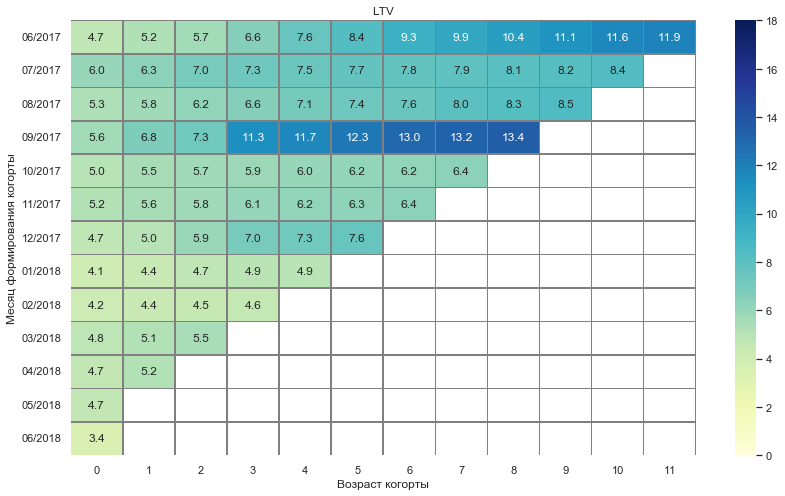

In [89]:
# нарисуем тепловую карту
plt.figure(figsize=(14, 8))
sns.heatmap(output_ltv.cumsum(axis=1), annot=True, fmt='.1f', linewidths=.5, linecolor='gray',\
           vmin=0, vmax=18, cmap='YlGnBu')
plt.title('LTV')
plt.xlabel('Возраст когорты')
plt.ylabel('Месяц формирования когорты')
plt.show();

In [90]:
print('LTV:', '{:.1f} $'.format(report['ltv'].mean()))

LTV: 1.1 $


- В среднем, доход с пользователя составляет - 1.1 долларов;
- LTV в первом месяце больше всего у когорт от 07.2017 (6 долларов) и от 09.2017 (5.6 долларов);
- LTV в первом месяце меньше всего у когорты от 06.2018 - 3.4 долларов.

#### Вывод

- Обычно пользователи совершают операцию покупки в свой первый же день;
- Среднее количество покупок на одного пользователя за весь период - 0.23;
- Средний чек за все время - 62.90;
- LTV - 1.1.
- Пользователи совершают очень мало покупок или не совершают их вовсе. Также с каждым последующим периодом оин покупают все меньше и меньше;
- LTV увеличивается с каждым последующим периодом, значит, пользователи все же приносят нам деньги.

### <a id='step6'>EDA. Маркетинг</a>

In [91]:
# посчитаем все расходы на рекламу
print('Сумма всех расходов на рекламу составляет: ', '{:.2f} $'.format(costs['costs'].mean()))

Сумма всех расходов на рекламу составляет:  129.48 $


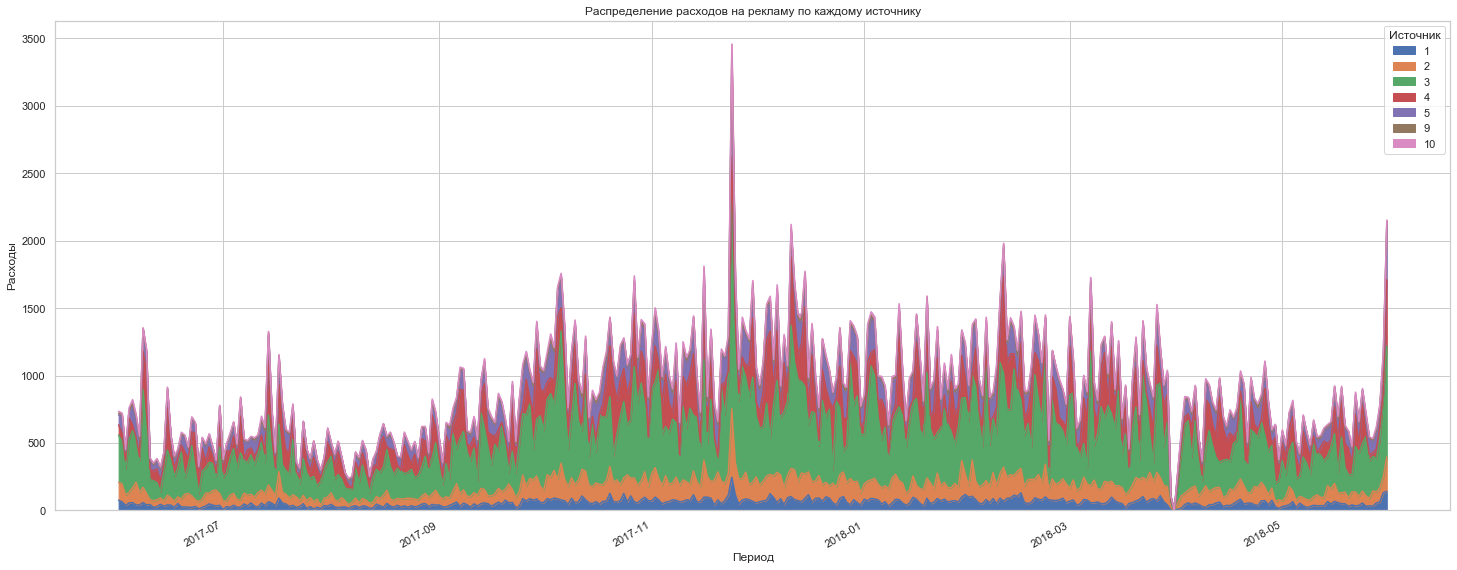

In [92]:
# нарисуем график распределения расходов на рекламу с разбивкой по источникам
costs.pivot_table(index='dt', columns='source_id', values='costs', aggfunc='sum')\
.plot(kind= 'area', figsize = (25, 10))
plt.title('Распределение расходов на рекламу по каждому источнику')
plt.xlabel('Период')
plt.ylabel('Расходы')
plt.legend(title = 'Источник')
plt.show();

- Больше всего расходов приходится на источники 10 и 3;
- Меньше всего расходов приходится на источники 1 и 2;
- Отсутствуюют данные по источникам 6, 7 и 8. Возможно, на них вообще ничего не расходуется;
- Пик расходов на рекламные источники приходится на 11.2017, что вполне обуславливается приближающимися новогодними праздниками.

In [93]:
# рассчитаем CAC

# рассчитаем расходы за месяц
monthly_costs = costs.groupby('month').sum()

# добавим данные о расходам в отчет и посчитаем CAC
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

# среднее cac для каждого покупателя c разбивкой по источнику
cac_source_id = report_new.groupby('source_id').agg({'cac':'mean'}).round(2).reset_index()

In [94]:
cac_source_id.head()

,source_id,cac
0,952,8.96
1,986,9.79
2,1020,9.17
3,1025,8.61
4,1054,9.48


In [95]:
print('Среднее значение CAC составляет', '{:.2f} $'.format(cac_source_id['cac'].mean()))

Среднее значение CAC составляет 9.20 $


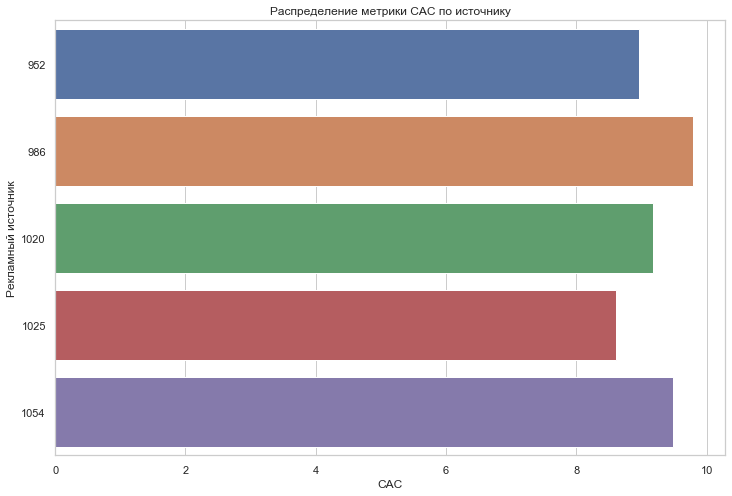

In [91]:
# нарисуем график
plt.figure(figsize=(12, 8))
ax=sns.barplot(data=cac_source_id, x='cac', y='source_id', orient='h')
plt.title('Распределение метрики CAC по источнику')
plt.xlabel('CAC')
plt.ylabel('Рекламный источник')
plt.show();

In [96]:
# рассчитаем ROMI
report_new['romi'] = (report_new['ltv'] / report_new['cac']).round(2)

In [97]:
# первые 5 строк
report_new.head()

,first_order_month,n_buyers,order_month,buy_ts,revenue,age,rate,gp,ltv,source_id,costs,cac,romi
0,2017-06-01,2023,2017-06-01,2354,9557.49,0,1.163618,9557.49,4.72,1020,18015.0,8.905091,0.53
1,2017-06-01,2023,2017-07-01,177,981.82,1,0.087494,981.82,0.49,1020,18015.0,8.905091,0.06
2,2017-06-01,2023,2017-08-01,174,885.34,2,0.086011,885.34,0.44,1020,18015.0,8.905091,0.05
3,2017-06-01,2023,2017-09-01,226,1931.30,3,0.111715,1931.30,0.95,1020,18015.0,8.905091,0.11
4,2017-06-01,2023,2017-10-01,292,2068.58,4,0.144340,2068.58,1.02,1020,18015.0,8.905091,0.11


In [98]:
print('ROMI:', round(report_new['romi'].mean(), 2))

ROMI: 0.12


In [99]:
# сводная для отрисовки графика
output_romi = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
output_romi.index = output_romi.index.strftime("%m/%Y")

In [100]:
output_romi.cumsum(axis=1).mean(axis=0)

age
0     0.540833
1     0.580909
2     0.631000
3     0.720000
4     0.785000
5     0.862857
6     0.898333
7     0.974000
8     1.062500
9     0.976667
10    1.105000
11    1.340000
dtype: float64

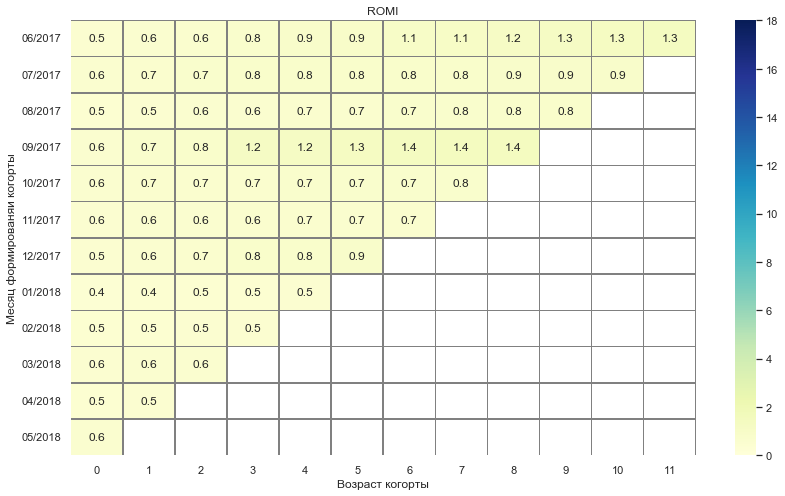

In [101]:
# нарисуем тепловую карту
plt.figure(figsize=(14, 8))
sns.heatmap(output_romi.cumsum(axis=1), annot=True, fmt='.1f', linewidths=.5, linecolor='gray',\
           vmin=0, vmax=18, cmap='YlGnBu')
plt.title('ROMI')
plt.xlabel('Возраст когорты')
plt.ylabel('Месяц формированяи когорты')
plt.show();

- Среднее значение ROMI - 0.12;
- В среднем, в первом месяца каждая когорты окупается на 0.6;
- Наименьшая окупаемость в первом месяца у когорты от 01.2018;
- Когорты начинают окупаться с 7 месяца.

#### Вывод

#### Продукт
- DAU - 908 пользователей;
- WAU - 5724 пользователей;
- MAU - 23228 пользователей;
- Среднее количество сессий в день - 987 сессий;
- ASL - средняя продолжительность пользовательской сессии - 60 секунд ;
- Retention Rate - 0,19.

---

#### Продажи
- Пользователи совершают первую покупку в первый день использования серсива;
- Среднее количество покупок на одного пользователя - 0.23 покупки;
- Средний чек за все время - 63 доллара;
- LTV - пожизненная ценность клиента - 1.1 долларов.

---

#### Маркетинг
- ROMI - возврат инвестиций в маркетинг - 0.12;
- В среднем, окупаемость когорты в первом месяце - 0.6;
- Когорты начинаются окупаться с 7 месяца жизни.
- Привлечение одного пользователя стоит - 9.2 долларов;
- Всего на маркетинг потрачено - 129.48 долларов.

---

#### Общие замечания
- Пользователи совершают очень мало покупок или не совершают их вовсем. С каждым последующим месяцем количество покупок в когортах снижается.
- LTV увеличивается с каждым месяцем, значит, какие-то деньги пользователи все же приносят;
- Наибольшая покупательная активность у когорт от 11.2017 и от 03.2018. Это может быть обусловлено приближающимися праздниками, ассортиментом мероприятий на сервисе, доступных в эти периоды. Очевидно, что когорта от 11.2017 покупает билеты на мероприятия перед Новым годом или новогодними праздниками. Когорты от 03.2018 покупает билеты на мероприятия, которые пройдут в период мартовских праздников (жаль, нет данных по полу пользователей, было бы интересно посчитать).

### <a id='step7'>Общий вывод</a>

#### Вывод

- Сервисом ежедневно пользуются 908 уникальных пользователей;
- Еженедельная аудитория сервиса - 5724 пользователей;
- Ежемесячная аудитория сервиса - 23228 пользвователей.
- Среднее количество сессий в день - 987 сессий;
- Средняя продолжительность пользователей сессии - 60 секунд;
- Коэффициент удержания пользователей - 0.19. Это достаточно низкое значение.

---

- Обычно пользователи совершают покупку в первый день использования сервиса;
- В среднем, на пользователя приходится 0.23 покупки. Это значит, что наши пользователи, к сожалению, практически не совершают покупкок на сервисе;
- Средний чек за все время - 63 доллара;
- Каждый пользователь приносит нам 1 доллар;
- Когорты пользователей начинают окупаться после седьмого месяца.

---

- Возврат инвестиций в маркетинг - 0.12. Это очень низкий коэффициент. Очевидно, что выбранные рекламные источники неэффективны;
- Привлечение одного пользователя обходится нам в 9 долларов. Это в 9 раз больше, чем мы получаем с одного пользователя.
- Всего на маркетинг было потрачено 129 долларов.

---

Исходя из полученных результатов можно сделать вывод, что проект Яндекс.Афиша убыточен и не приносит прибыли. Расходы на маркетинг в два раза превышают расходы каждого пользователя. Используются неэффективные рекламные источники. Мобильной версией сервиса пользователи практически не пользуются, предпочитая десктопную. Совершают покупки - буквально - единицы пользователей, а подавляющее большинство заходят на сайт и уходят через 60 секунд, отсюда средняя продолжительность пользовательской сессии. 


Что тут можно сделать? Необходимо работать над продуктовыми метриками Retention Rate, LTV, CAC, ROMI, средним чеком и количеством покупок на одного пользователя. Необходимо изучить и выбрать другие рекламые источники, т.к те, что сейчас используются, попросту неэффективные. Стоит отказаться от источников 1, 7, 9 и 10. Нужно обратить внимание на источники 3, 4 и 5. Необходимо доработать мобильную версию сервиса, чтобы пользователис смогли использовать и ее тоже, т.к основной трафие мог бы приходить через нее. Также необходим исправить десктопную версию сервиса, потому что с ней очевидно что-то не так, раз пользователи заходят на 60 секунд и уходят, не совершив покупки.